In [1]:
import cv2
import numpy as np
import matplotlib

from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = (13, 8)

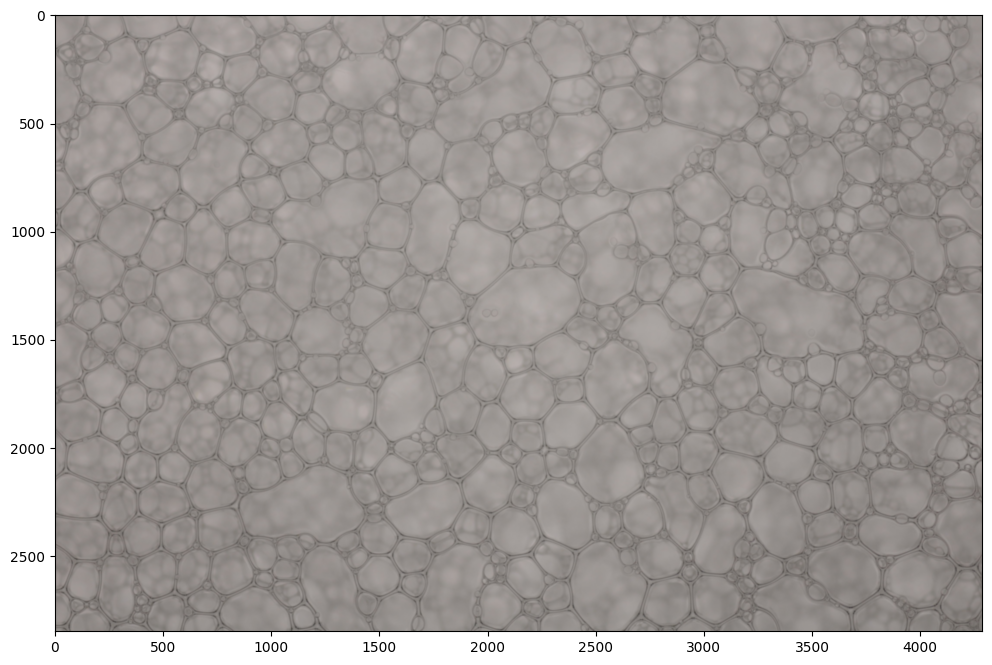

In [2]:
img = cv2.imread('pena.tif')
cv2.imwrite("assets/beer_input.jpg", img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray', interpolation = 'bicubic')

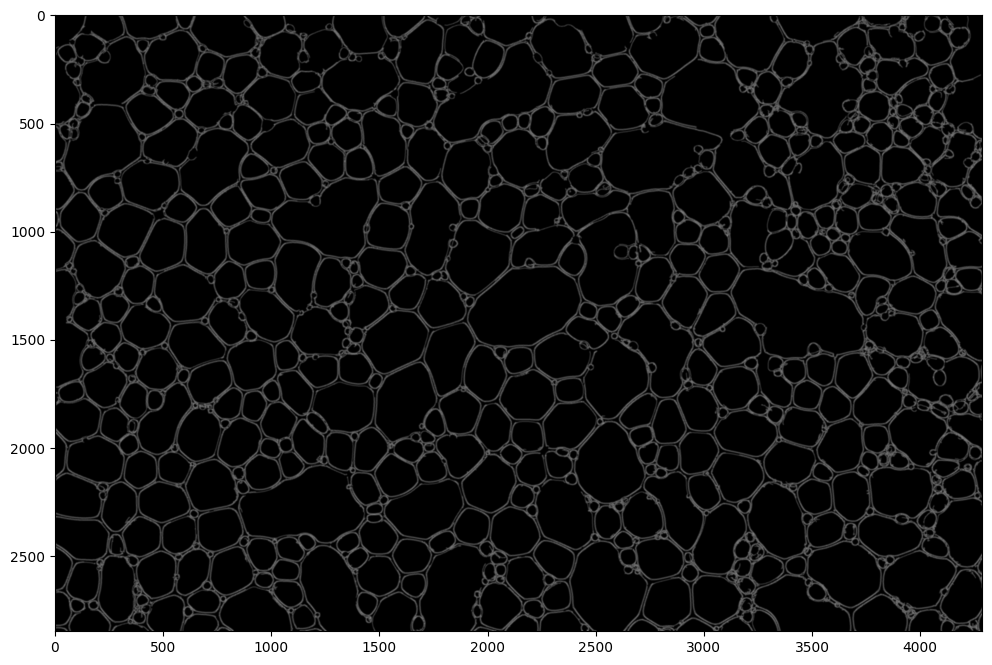

In [3]:
edge = cv2.Canny(img, 20, 200)
cv2.imwrite("assets/beer_edges.jpg", edge)
plt.imshow(edge, cmap='gray', interpolation = 'bicubic')

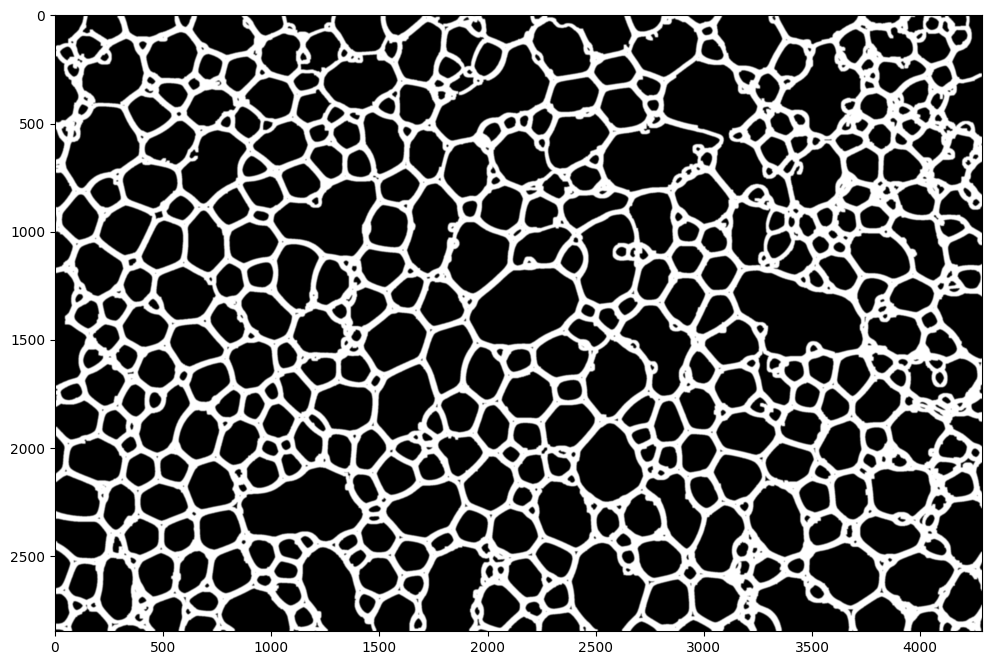

In [4]:
kernel = np.ones((5, 5), np.uint8)
img_dilation = cv2.dilate(edge, kernel, iterations=3)
cv2.imwrite("assets/beer_dilated.jpg", img_dilation)
plt.imshow(img_dilation, cmap='gray', interpolation = 'bicubic')

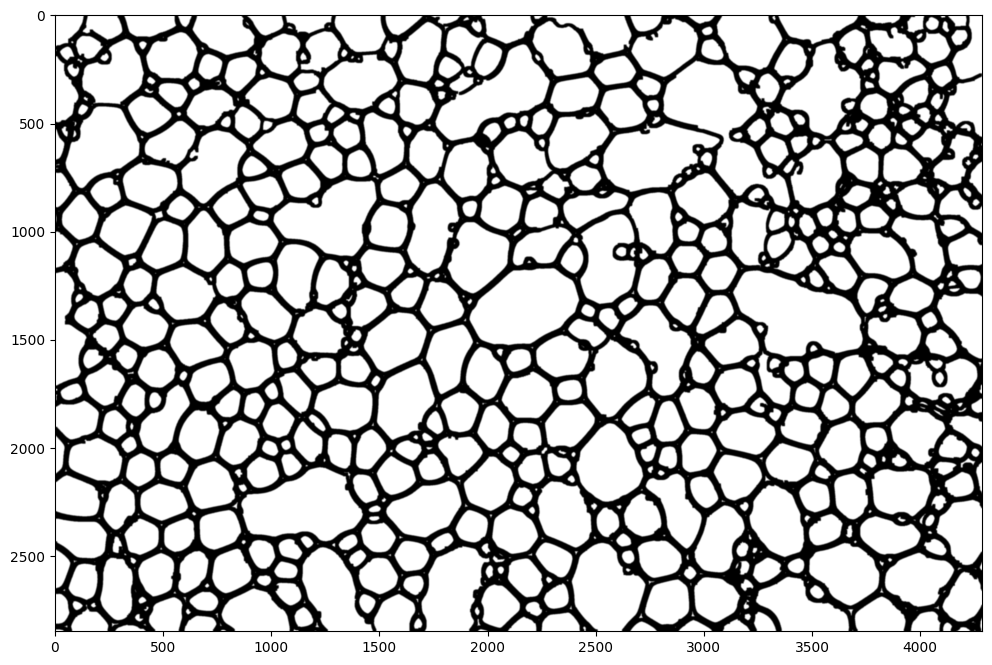

In [5]:
img_reverted = cv2.bitwise_not(img_dilation)
plt.imshow(img_reverted, cmap='gray', interpolation = 'bicubic')

In [8]:
cnts,_ = cv2.findContours(img_reverted.copy(), cv2.RETR_LIST,
		cv2.CHAIN_APPROX_SIMPLE)

out = img.copy()
final_countours = []
for c in cnts:
    ((x, y), r) = cv2.minEnclosingCircle(c)
    if cv2.contourArea(c) > 40 and r>10:
        final_countours.append(c)

len(final_countours)

606

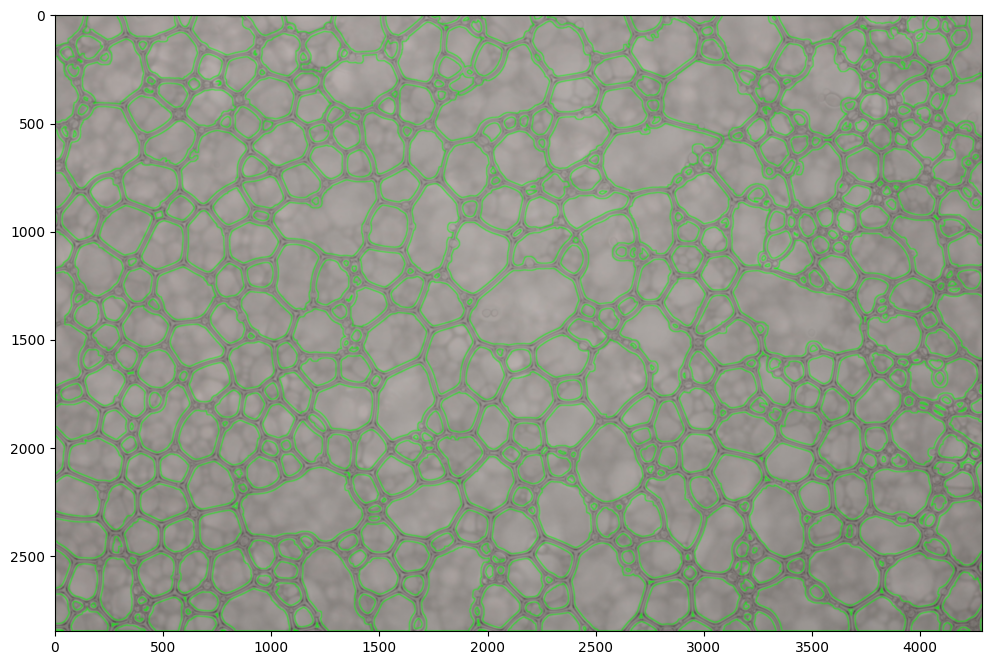

In [9]:
out = img.copy()
cv2.drawContours(out, final_countours, -1, (0, 255, 0), 2)
cv2.imwrite("assets/beer_output.jpg", out)
plt.figure(figsize=(13, 8))
plt.imshow(out, cmap='gray', interpolation='bicubic')